In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('dataset.csv')

In [35]:
df

,age,sex,drug,reaction,hospitalized
0,26.0,1.0,DURAGESIC-100,DRUG ADMINISTRATION ERROR,0
1,77.0,2.0,BONIVA,Vomiting,0
2,NaN,2.0,IBUPROFEN,Dyspepsia,0
3,NaN,1.0,LYRICA,Drug ineffective,0
4,NaN,2.0,DOXYCYCLINE HYCLATE,Drug hypersensitivity,0
...,...,...,...,...,...
9995,50.0,1.0,LYRICA,Back pain,0
9996,56.0,2.0,LYRICA,Weight increased,0
9997,48.0,1.0,LIPITOR,Drug hypersensitivity,0
9998,NaN,2.0,LYRICA,Dizziness,0


In [36]:
# shape
df.shape

(10000, 5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6650 non-null   float64
 1   sex           9926 non-null   float64
 2   drug          10000 non-null  object 
 3   reaction      10000 non-null  object 
 4   hospitalized  10000 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [58]:
df.isnull().sum()

age             3350
sex               74
drug               0
reaction           0
hospitalized       0
dtype: int64

In [56]:
df.sample()

,age,sex,drug,reaction,hospitalized
5075,62.0,2.0,LETAIRIS,Middle insomnia,0


In [94]:
import numpy as np

df['age'] = df['age'].fillna(df['age'].median())
df['age'] = np.where(df['age'] == df['age'].median(), 1, 0)

df['sex'] = df['sex'].fillna(0)
df['sex'] = np.where(df['sex'] == 0, 1, 0)


In [95]:
df.isnull().sum()

age             0
sex             0
drug            0
reaction        0
hospitalized    0
age_missing     0
sex_missing     0
dtype: int64

In [106]:
df.sample(5)

,age,sex,drug,reaction,hospitalized,age_missing,sex_missing
786,1,0,JANUVIA,Pancreatitis acute,1,0,0
7924,1,0,CETIRIZINE 10 MG,Extra dose administered,0,0,0
4544,1,0,AVELOX,Deafness,0,0,0
2441,0,0,TYSABRI,Cough,0,1,0
661,0,0,DEPAKOTE,Neutrophil count decreased,0,1,0


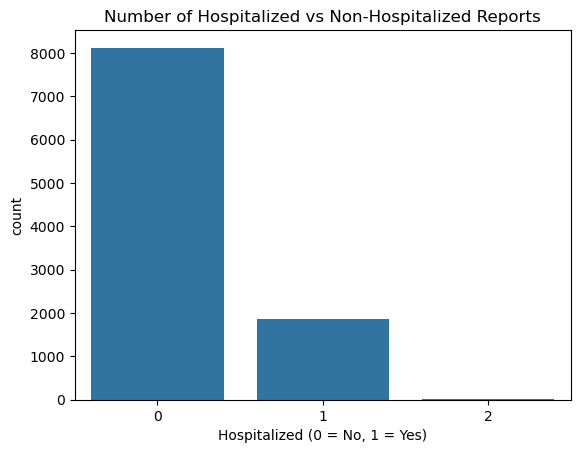

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='hospitalized', data=df)
plt.xlabel('Hospitalized (0 = No, 1 = Yes)')
plt.title('Number of Hospitalized vs Non-Hospitalized Reports')
plt.show()


In [114]:
from sklearn.preprocessing import LabelEncoder

# Fill missing age with median and add missing flag
df['age'] = df['age'].fillna(df['age'].median())
df['age_missing'] = df['age'].isna().astype(int)

# Fill missing sex with 0 and add missing flag
df['sex'] = df['sex'].fillna(0)
df['sex_missing'] = (df['sex'] == 0).astype(int)

# Replace rare drugs with 'Other'
top_drugs = df['drug'].value_counts().nlargest(20).index
df['drug'] = df['drug'].apply(lambda x: x if x in top_drugs else 'Other')

# Encode drug
le_drug = LabelEncoder()
df['drug_enc'] = le_drug.fit_transform(df['drug'].astype(str))

# Same for reaction
top_reactions = df['reaction'].value_counts().nlargest(20).index
df['reaction'] = df['reaction'].apply(lambda x: x if x in top_reactions else 'Other')
le_reaction = LabelEncoder()
df['reaction_enc'] = le_reaction.fit_transform(df['reaction'].astype(str))

# Features and target
X = df[['age', 'sex', 'age_missing', 'sex_missing', 'drug_enc', 'reaction_enc']]
y = df['hospitalized']


In [115]:
df.sample(5)

,age,sex,drug,reaction,hospitalized,age_missing,sex_missing,drug_enc,reaction_enc
2576,1,0,Other,Pneumonia,1,0,1,15,18
6018,1,0,Other,Other,0,0,1,15,16
3319,1,0,Other,Other,0,0,1,15,16
6177,0,0,JAKAFI,Other,0,0,1,8,16
1971,0,0,Other,Drug ineffective,0,0,1,15,7


Accuracy: 0.5375

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.73      1608
           1       0.32      0.29      0.31       392
           2       0.00      0.00      0.00         0

    accuracy                           0.54      2000
   macro avg       0.42      0.30      0.35      2000
weighted avg       0.82      0.54      0.65      2000


Confusion Matrix:
 [[960 241 407]
 [ 63 115 214]
 [  0   0   0]]


/home/unique/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/unique/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/unique/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


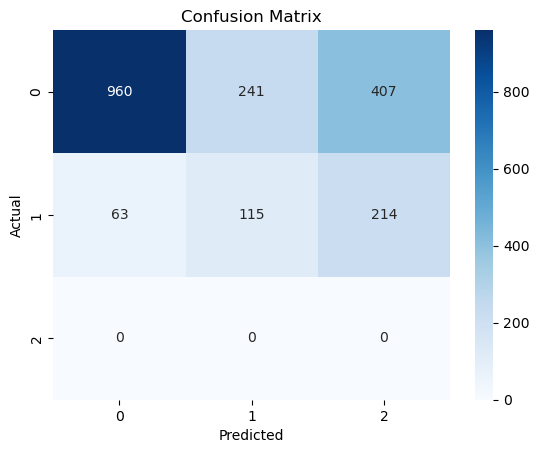

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
////redoo 